# 1 - Import the libraries

In [2]:
import os
from glob import glob

import numpy as np
import random
import cv2
import matplotlib.pyplot as plt
from matplotlib import patches
import seaborn as sns

from sklearn.metrics import confusion_matrix

from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, BatchNormalization, LeakyReLU
from keras.utils import to_categorical
from tensorflow.keras.callbacks import ModelCheckpoint

In [1]:
pip install numpy opencv-python matplotlib seaborn scikit-learn tensorflow


  Using cached joblib-1.4.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached threadpoolctl-3.5.0-py3-none-any.whl.metadata (13 kB)
  Using cached absl_py-2.1.0-py3-none-any.whl.metadata (2.3 kB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl.metadata (4.4 kB)
  Using cached flatbuffers-24.3.25-py2.py3-none-any.whl.metadata (850 bytes)
  Using cached google_pasta-0.2.0-py3-none-any.whl.metadata (814 bytes)
  Using cached libclang-18.1.1-py2.py3-none-win_amd64.whl.metadata (5.3 kB)
  Using cached opt_einsum-3.3.0-py3-none-any.whl.metadata (6.5 kB)
  Using cached setuptools-75.1.0-py3-none-any.whl.metadata (6.9 kB)
  Using cached termcolor-2.4.0-py3-none-any.whl.metadata (6.1 kB)
  Using cached wheel-0.44.0-py3-none-any.whl.metadata (2.3 kB)
  Using cached namex-0.0.8-py3-none-any.whl.metadata (246 bytes)
  Using cached tensorboard_data_server-0.7.2-py3-none-any.whl.metadata (1.1 kB)
  Using cached markdown_it_py-3.0.0-py3-none-any.whl.metadata (6.9 kB)
  Using cached mdurl-0.1.2-p

# 2 - Load the data, create the train, validation and test datasets, and show some sample images

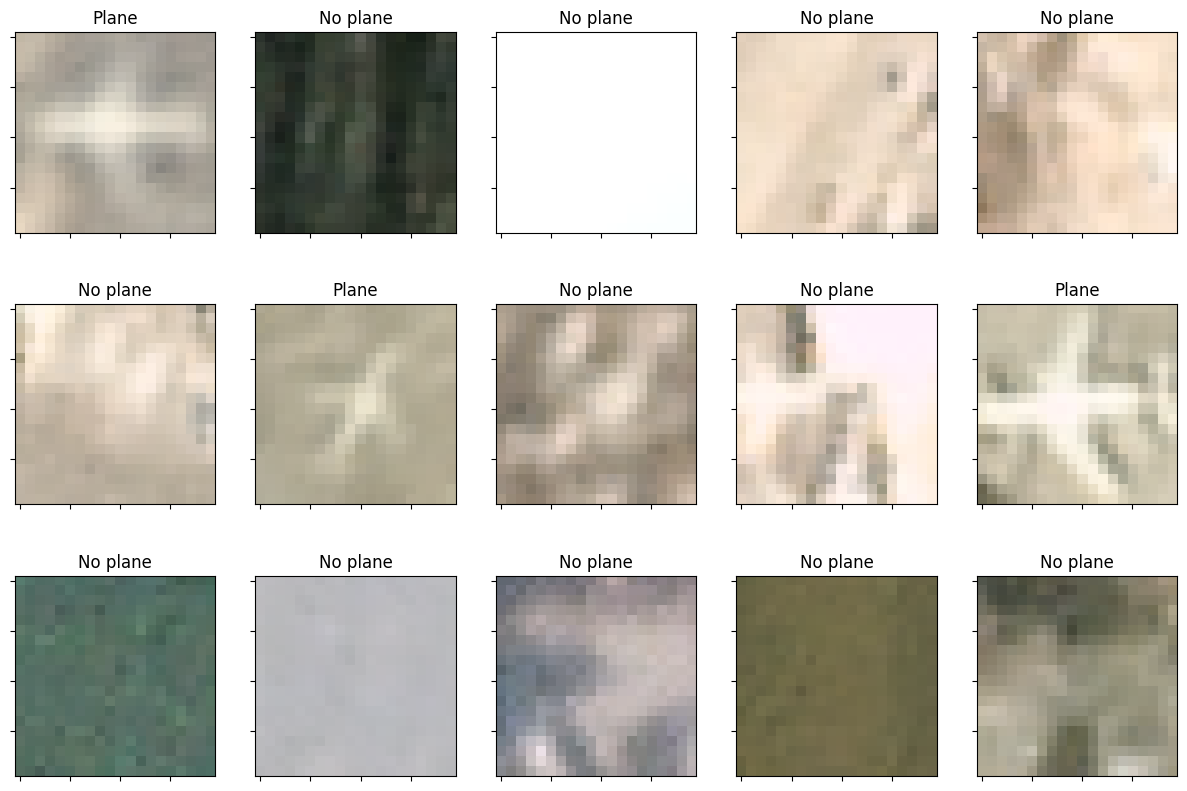

In [4]:
import os
from glob import glob
import numpy as np
import random
import cv2
import matplotlib.pyplot as plt
from keras.utils import to_categorical

# Set basepath
basepath = "../planesnet/planesnet"

# Generate a list of files for plane and no_plane files
files_list_no_plane = glob(os.path.join(basepath, "0_*"))
files_list_plane = glob(os.path.join(basepath, "1_*"))

# Open the files
images = []
labels = []
text_labels = ['No plane', 'Plane']

# Load no_plane images
for img_path in files_list_no_plane:
    img = cv2.imread(img_path)
    
    # Check if the image was loaded successfully
    if img is None:
        print(f"Failed to load image: {img_path}")
        continue
    
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    images.append(img)
    labels.append(0)

# Load plane images
for img_path in files_list_plane:
    img = cv2.imread(img_path)
    
    # Check if the image was loaded successfully
    if img is None:
        print(f"Failed to load image: {img_path}")
        continue
    
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    images.append(img)
    labels.append(1)
    
images = np.array(images, dtype=np.int64)
labels = np.array(labels, dtype=np.int64)

# Split the data into train (70%), validation (20%), and test (10%) datasets
np.random.seed(27)
np.random.shuffle(images)

np.random.seed(27)
np.random.shuffle(labels)

train = int(0.7 * len(images))
validation = int(0.2 * len(images))
test = int(0.1 * len(images))

X_train, y_train = images[:train], labels[:train]
X_validation, y_validation = images[train:(validation + train)], labels[train:(validation + train)]
X_test, y_test = images[(validation + train):], labels[(validation + train):]

n_classes = 2

# Change the labels from categorical to one-hot encoding
y_train = to_categorical(y_train, n_classes)
y_validation = to_categorical(y_validation, n_classes)
y_test = to_categorical(y_test, n_classes)

# Plot some sample images
n_rows = 3
n_cols = 5

plt.figure(figsize=(15, 10))
for i in range(n_rows * n_cols):
    ax = plt.subplot(n_rows, n_cols, i + 1)
    ax.set_yticklabels([])
    ax.set_xticklabels([])
    index = random.randint(0, len(X_train) - 1)
    plt.imshow(X_train[index])
    plt.title(text_labels[np.argmax(y_train[index])])

plt.show()


# 3 - Define the Convolutional Neural Network

In [5]:
# Define the Neural Network
model = Sequential()

model.add(Conv2D(32, (3, 3), activation='linear', input_shape = (20, 20, 3), padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D((2, 2), padding='same'))
model.add(Dropout(0.25))
model.add(BatchNormalization())

model.add(Conv2D(64, (3, 3), activation='linear', padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D((2, 2), padding='same'))
model.add(Dropout(0.25))
model.add(BatchNormalization())

model.add(Conv2D(128, (3, 3), activation='linear', padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D((2, 2), padding='same'))
model.add(Dropout(0.25))
model.add(BatchNormalization())

model.add(Conv2D(256, (3, 3), activation='linear', padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D((2, 2), padding='same'))
model.add(Dropout(0.25))
model.add(BatchNormalization())

model.add(Flatten())

model.add(Dense(256, activation='linear'))
model.add(LeakyReLU(alpha=0.1))
model.add(Dropout(0.25))
model.add(BatchNormalization())

model.add(Dense(64, activation='linear'))
model.add(LeakyReLU(alpha=0.1))
model.add(Dropout(0.25))
model.add(BatchNormalization())

model.add(Dense(n_classes, activation='softmax'))

model.summary()

c:\Users\PC\Documents\GitHub\Artificial-Intelligence-Platform_Satellite\.venv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
c:\Users\PC\Documents\GitHub\Artificial-Intelligence-Platform_Satellite\.venv\Lib\site-packages\keras\src\layers\activations\leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 20, 20, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu (LeakyReLU)         │ (None, 20, 20, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 10, 10, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 10, 10, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 10, 10, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 10, 10, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_1 (LeakyReLU)       │ (None, 10, 10, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 5, 5, 64)       │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 5, 5, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_2 (LeakyReLU)       │ (None, 5, 5, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 3, 3, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 3, 3, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 3, 3, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 3, 3, 256)      │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_3 (LeakyReLU)       │ (None, 3, 3, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 2, 2, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 2, 2, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 2, 2, 256)      │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │       262,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_4 (LeakyReLU)       │ (None, 256)            │             

 Total params: 670,594 (2.56 MB)

 Trainable params: 668,994 (2.55 MB)

 Non-trainable params: 1,600 (6.25 KB)

# 4 - Compile and fit the model

In [6]:
# Compile and fit the NN 
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
checkpoint = ModelCheckpoint("plane_detection.keras", monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
history = model.fit(X_train, y_train, batch_size=16, epochs=40, verbose=1, validation_data=(X_validation, y_validation), callbacks=[checkpoint])

Epoch 1/40
1394/1400 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7950 - loss: 0.4481
Epoch 1: val_accuracy improved from -inf to 0.90750, saving model to plane_detection.keras
1400/1400 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.7953 - loss: 0.4476 - val_accuracy: 0.9075 - val_loss: 0.2189
Epoch 2/40
1396/1400 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9029 - loss: 0.2453
Epoch 2: val_accuracy did not improve from 0.90750
1400/1400 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.9029 - loss: 0.2453 - val_accuracy: 0.8211 - val_loss: 0.3928
Epoch 3/40
1399/1400 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9210 - loss: 0.2025
Epoch 3: val_accuracy improved from 0.90750 to 0.93594, saving model to plane_detection.keras
1400/1400 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.9211 - loss: 0.2025 - val_accuracy: 0.9359 - val_loss: 0.1678
Epoch 4/40
1399/1400 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9363 - loss: 0.1700
Epoch 4: val_accuracy did not improve from 0.93594
1

# 5 - Evaluate the model

In [7]:
# Evaluate the model
score = model.evaluate(X_test, y_test, verbose=1)
print('Test Loss:', score[0])
print('Test Accuracy:', score[1])

100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9860 - loss: 0.0368
Test Loss: 0.03640724718570709
Test Accuracy: 0.9862499833106995


# 6 - Show accuracy and loss plots of the model

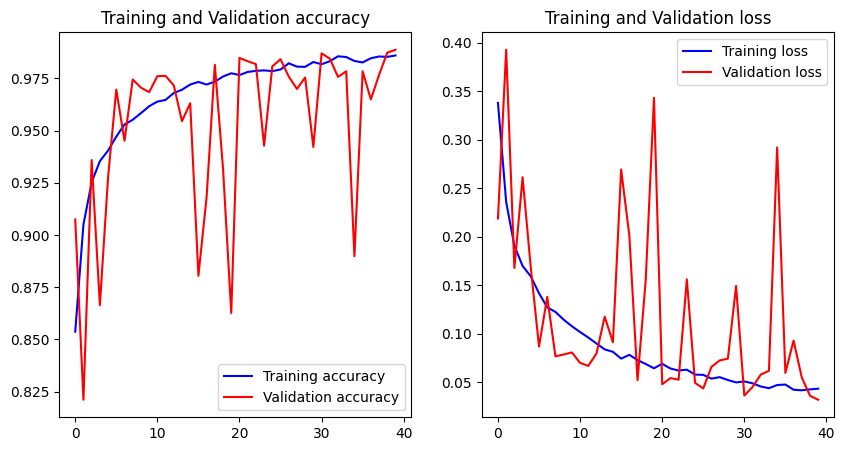

In [8]:
# Show accuracy and loss plots of the model 
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(accuracy))

plt.figure(figsize=(10,5))
ax = plt.subplot(1, 2, 1)
plt.plot(epochs, accuracy, 'b', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'r', label='Validation accuracy')
plt.title('Training and Validation accuracy')
plt.legend()

ax = plt.subplot(1, 2, 2)
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and Validation loss')
plt.legend()
plt.show()

# 7 - Predict

In [9]:
# Obtain predictions
predicted_class = model.predict(X_test)

predicted_class_probability = np.max(predicted_class, axis=1)*100
predicted_class = np.argmax(predicted_class, axis=1)
true_class = np.argmax(y_test, axis=1)

correct = []
incorrect = []

for i in range(len(predicted_class)):
    if predicted_class[i] == true_class[i]:
        correct.append(i)
    else:
        incorrect.append(i)

print('Correct predictions: ', len(correct))        
print('Incorrect predictions: ', len(incorrect))  

100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
Correct predictions:  3156
Incorrect predictions:  44


# 8 - Show CORRECT predictions

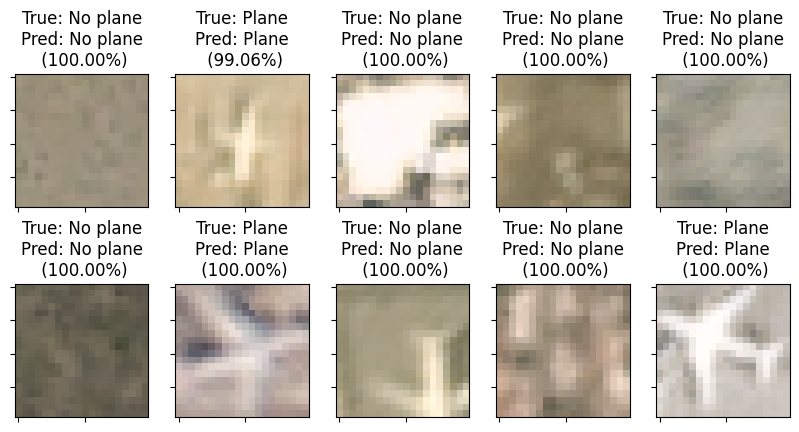

In [12]:
random.shuffle(correct)
random.shuffle(incorrect)

# Show some CORRECT PREDICTIONS
n_rows = 2
n_cols = 5

plt.figure(figsize=(10, 5))
for i in range(n_rows*n_cols):
    ax = plt.subplot(n_rows, n_cols, i + 1)
    ax.set_yticklabels([])
    ax.set_xticklabels([])
    plt.imshow(X_test[correct[i]], cmap=plt.get_cmap('gray'))
    plt.title('True: ' + str(text_labels[true_class[correct[i]]]) + 
              '\nPred: ' + str(text_labels[predicted_class[correct[i]]]) +
              '\n' + " (%.2f%%)" % predicted_class_probability[correct[i]])

# 9 - Show INCORRECT predictions

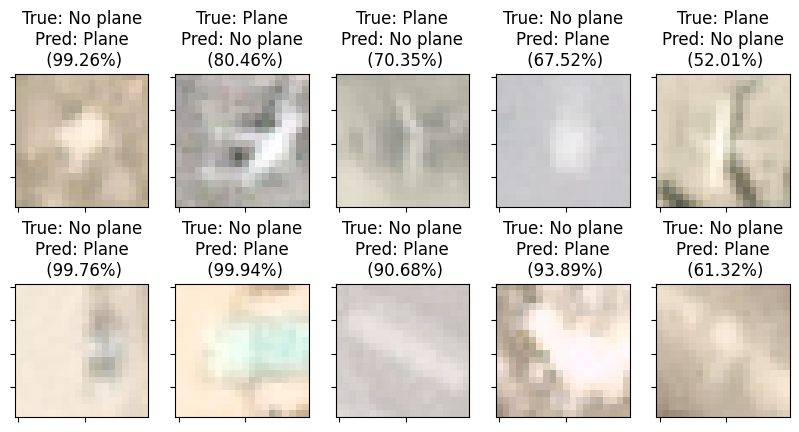

In [16]:
# Show some INCORRECT PREDICTIONS
n_rows = 2
n_cols = 5

plt.figure(figsize=(10, 5))
for i in range(n_rows*n_cols):
    ax = plt.subplot(n_rows, n_cols, i + 1)
    ax.set_yticklabels([])
    ax.set_xticklabels([])
    plt.imshow(X_test[incorrect[i]], cmap=plt.get_cmap('gray'))
    plt.title('True: ' + str(text_labels[true_class[incorrect[i]]]) + 
              '\nPred: ' + str(text_labels[predicted_class[incorrect[i]]]) +
              '\n' + " (%.2f%%)" % predicted_class_probability[incorrect[i]])

# 10 - Show Confussion Matrix

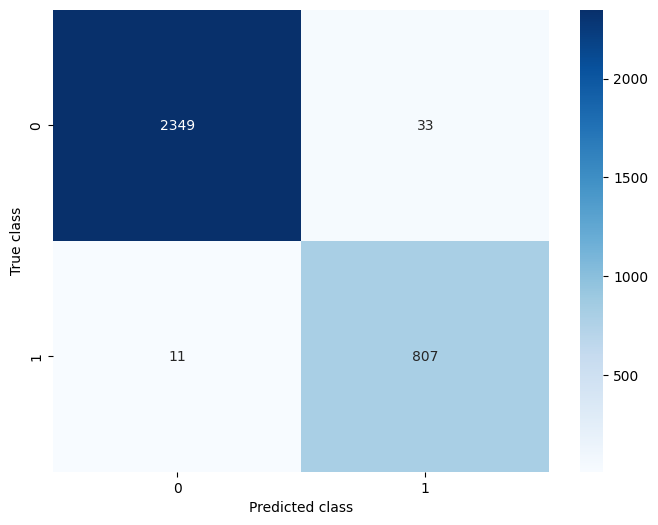

In [24]:
# Show confussion Matrix
cm = confusion_matrix(true_class, predicted_class)
plt.subplots(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt=".0f", cmap='Blues')
plt.xlabel("Predicted class")
plt.ylabel("True class")
plt.show()

# 11 - Identify planes on scene

Step 0 of 145
Step 1 of 145
Step 2 of 145
Step 3 of 145
Step 4 of 145
Step 5 of 145
Step 6 of 145
Step 7 of 145
Step 8 of 145
Step 9 of 145
Step 10 of 145
Step 11 of 145
Step 12 of 145
Step 13 of 145
Step 14 of 145
Step 15 of 145
Step 16 of 145
Step 17 of 145
Step 18 of 145
Step 19 of 145
Step 20 of 145
Step 21 of 145
Step 22 of 145
Step 23 of 145
Step 24 of 145
Step 25 of 145
Step 26 of 145
Step 27 of 145
Step 28 of 145
Step 29 of 145
Step 30 of 145
Step 31 of 145
Step 32 of 145
Step 33 of 145
Step 34 of 145
Step 35 of 145
Step 36 of 145
Step 37 of 145
Step 38 of 145
Step 39 of 145
Step 40 of 145
Step 41 of 145
Step 42 of 145
Step 43 of 145
Step 44 of 145
Step 45 of 145
Step 46 of 145
Step 47 of 145
Step 48 of 145
Step 49 of 145
Step 50 of 145
Step 51 of 145
Step 52 of 145
Step 53 of 145
Step 54 of 145
Step 55 of 145
Step 56 of 145
Step 57 of 145
Step 58 of 145
Step 59 of 145
Step 60 of 145
Step 61 of 145
Step 62 of 145
Step 63 of 145
Step 64 of 145
Step 65 of 145
Step 66 of 145
Step 

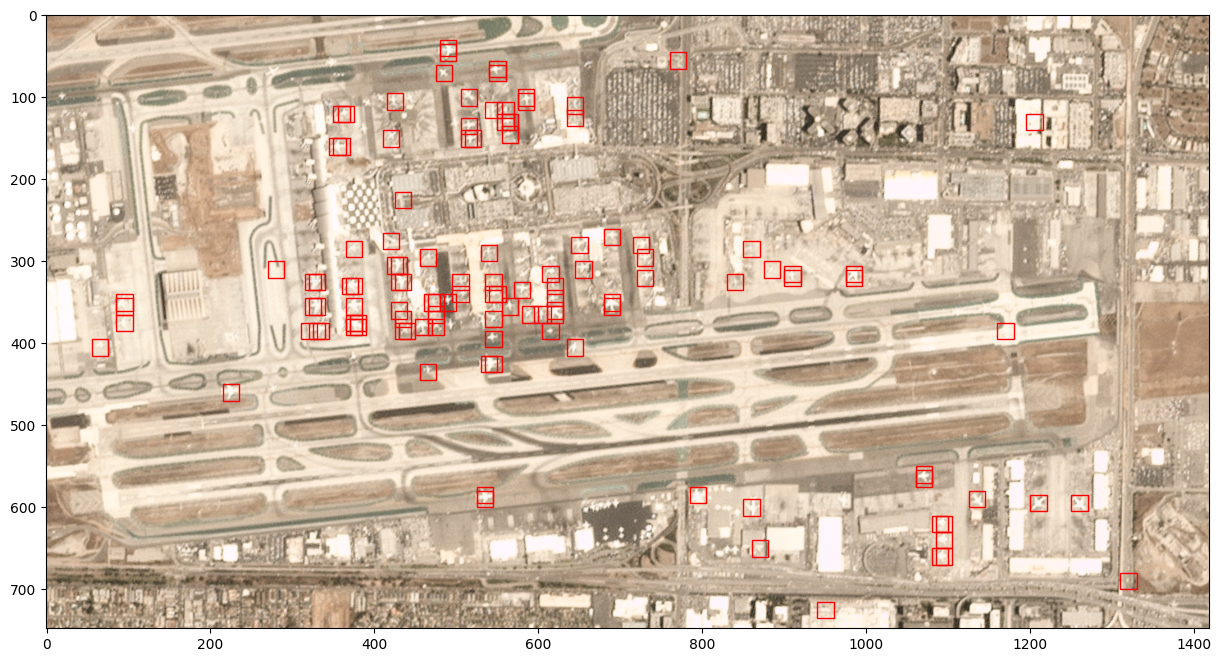

In [34]:
# Load and show scene
basepath = "../scenes/scenes/"

scene_list = glob(os.path.join(basepath, "*3*"))
scene_file = scene_list[0]

img = cv2.imread(scene_file)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
height, width, _ = img.shape

plt.figure(figsize=(15, 15))
ax = plt.subplot(1, 1, 1)
ax.imshow(img)

stride = 5
for h in range(0, height-20, stride):
    print("Step", int(h/stride), "of", int((height-20)/stride))
    
    for w in range(0, width-20, stride):  
        img_box = []
        img_box.append(img[h:h+20, w:w+20])
        img_box = np.array(img_box, dtype=np.int64)
        prediction = model.predict(img_box, verbose=False)
        prediction = np.argmax(prediction)
        
        if prediction == 1:
            ax.add_patch(patches.Rectangle((w, h), 20, 20, edgecolor='r', facecolor='none'))
            
plt.show()